In [1]:
import pandas as pd

In [2]:
path = 'D:\\DataDrivenMKT\\Data\\Chapter2_KPI'
nps_df = pd.read_csv(path+'\\nps.csv')

In [3]:
churn_df = pd.read_csv(path+'\\muscle_labs.csv')

Tính Net Promoter Score  cho từng tháng 
NPS is then calculated as the percentage of promoters minus the percentage of detractors.
•	Score>=0 and <=6: Detractor
•	Score in (7,8): Passive
•	Score in (9,10): Promoter

In [4]:
pd.to_datetime(nps_df['event_date']).dt.strftime('%Y-%m')

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
3321    2020-12
3322    2020-12
3323    2020-12
3324    2020-12
3325    2020-12
Name: event_date, Length: 3326, dtype: object

In [5]:
nps_df['event_month'] = pd.to_datetime(nps_df['event_date']).dt.month
nps_df

,event_date,user_id,score,event_month
0,2020-01-01 19:00:51,290067447,8,1
1,2020-01-02 17:34:43,223014806,10,1
2,2020-01-02 19:11:55,187864388,10,1
3,2020-01-02 19:27:00,318758952,8,1
4,2020-01-02 21:42:19,189933311,0,1
...,...,...,...,...
3321,2020-12-30 21:24:28,289219785,8,12
3322,2020-12-31 02:01:19,187133285,7,12
3323,2020-12-31 05:30:00,202035502,10,12
3324,2020-12-31 06:12:32,196225609,10,12


In [6]:
nps_df['group'] = pd.cut(nps_df['score'],bins=[-1,6,8,10],\
                         labels = ['Detractor','Passive','Promoter'],right=True)

In [7]:
nps_score = nps_df.groupby(['event_month','group'])['group'].count().unstack()
nps_score['%Detractor'] = nps_score['Detractor']/nps_score.sum(axis=1)
nps_score['%Promoter'] = nps_score['Promoter']/nps_score.sum(axis=1)

In [8]:
import matplotlib.pyplot as plt

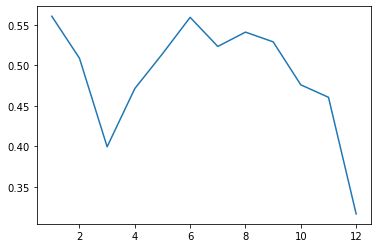

In [9]:
nps_score['nps_score'] = nps_score['%Promoter'] - nps_score['%Detractor']
plt.plot(nps_score['nps_score'])

Ex2: Tính tỷ lệ churn_rate cho từng tháng

Exercise

Create a function that takes as input an integer representing a month in the format yyyymm and returns the number of rows churn_df satisfying all of the following criteria:

- start_date occurred before the first day of then given month
- end_date is later than the last day of the previous month
- Create a column in churn named total_customers that is the result of applying the function created in the previous step to `churn["yearmonth"].
Calculate the churn rate for each month:
- Divide the total_churned column by total_customers
- Assign the result to a column called churn_rate
- Set yearmonth as a string type.

In [11]:
churn_df

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500
...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50


In [12]:
churn_df['start_date'] = pd.to_datetime(churn_df['start_date'])
churn_df['end_date'] = pd.to_datetime(churn_df['end_date'])

In [16]:
churn_df['year_month'] = churn_df['start_date'].dt.strftime('%Y%m')
churn_df['churn_year_month'] = churn_df['end_date'].dt.strftime('%Y%m')

In [17]:
###Calculate the total of churn customers for each month
sub2_df = churn_df.groupby('churn_year_month')['end_date'].count().reset_index()
sub2_df.columns = ['year_month','total_churned']

In [18]:
sub2_df

,year_month,total_churned
0,201103,8
1,201104,16
2,201105,29
3,201106,27
4,201107,37
5,201108,40
6,201109,39
7,201110,47
8,201111,45
9,201112,100


In [21]:
import datetime as dt

def get_customers(yearmonth):
    year = int(yearmonth/100) # integer will be rounded off to closest integer
    month = yearmonth - (year*100)
    date = dt.datetime(year, month, 1) # sets the date to 1st day of month
    return ((churn_df["start_date"] < date) & (date <= churn_df["end_date"])).sum()

ex: user vs start_date < 20220201 va end_date>= 20220201 tuc la user do duoc tinh la\
    active user cho thang 1 vi dang ky truoc thang 1 va khong churn trong thang 1

In [23]:
sub_df = pd.DataFrame(churn_df['year_month'].unique())
sub_df.columns =['year_month']
sub_df['year_month'] = sub_df['year_month'].astype('int')

In [24]:
sub_df["total_customers"] = sub_df["year_month"].apply(get_customers)

In [25]:
sub_df['year_month'] = sub_df['year_month'].astype('str')

In [26]:
sub2_df = pd.merge(sub2_df,sub_df,on='year_month',how='left')
sub2_df['churn_rate'] = sub2_df['total_churned']/sub2_df['total_customers']

In [27]:
sub2_df

,year_month,total_churned,total_customers,churn_rate
0,201103,8,47.0,0.170213
1,201104,16,82.0,0.195122
2,201105,29,105.0,0.276190
3,201106,27,155.0,0.174194
4,201107,37,194.0,0.190722
5,201108,40,220.0,0.181818
6,201109,39,247.0,0.157895
7,201110,47,254.0,0.185039
8,201111,45,273.0,0.164835
9,201112,100,341.0,0.293255


<AxesSubplot:xlabel='year_month'>

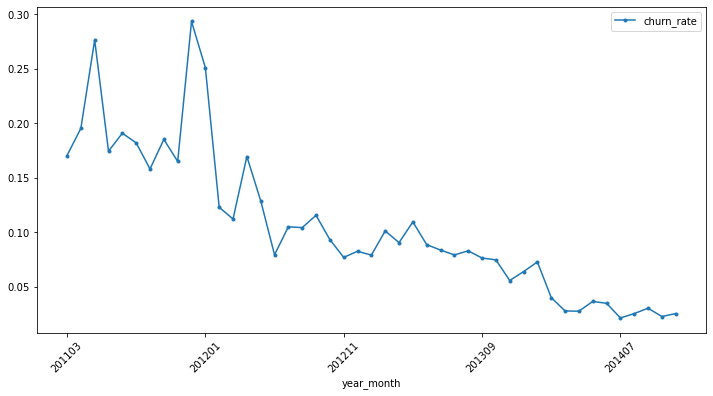

In [28]:
sub2_df.plot(x="year_month", y="churn_rate", figsize=(12,6), rot=45, marker=".")